In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/autos.csv")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,24-03-2016 00:00,0.0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000.0,8,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,31-03-2016 00:00,0.0,60437,06-04-2016 10:17


In [3]:
print(df.seller.value_counts())

#remove the seller type having only 3 cars

df[df.seller != 'gewerblich']

#now all the sellers are same so we can get rid of this column df=df.drop('seller',1)

#print al the different sellers

print(df.offerType.value_counts())

#remove the Offer Type having only 12 listings

df[df.offerType != 'Gesuch']

#now all the offers are same so we can get rid of this column df-df.drop('offerType',1)

privat              371232
Angebot                302
gewerblich               3
25-03-2016 00:00         1
Name: seller, dtype: int64
Angebot    371223
0              14
Gesuch         12
5500            7
2000            6
            ...  
2699            1
1600            1
9750            1
24950           1
3650            1
Name: offerType, Length: 182, dtype: int64


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,24-03-2016 00:00,0.0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000.0,8,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,31-03-2016 00:00,0.0,60437,06-04-2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000.0,1,NaN,sonstige_autos,NaN,14-03-2016 00:00,0.0,39576,06-04-2016 00:46
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000.0,3,benzin,smart,nein,05-03-2016 00:00,0.0,26135,11-03-2016 18:17
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000.0,3,diesel,volkswagen,nein,19-03-2016 00:00,0.0,87439,07-04-2016 07:15
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000.0,6,diesel,volkswagen,NaN,20-03-2016 00:00,0.0,40764,24-03-2016 12:45


In [4]:
print(df.shape)

(371539, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371539 non-null  object 
 1   name                 371538 non-null  object 
 2   seller               371538 non-null  object 
 3   offerType            371538 non-null  object 
 4   price                371538 non-null  object 
 5   abtest               371512 non-null  object 
 6   vehicleType          333694 non-null  object 
 7   yearOfRegistration   371517 non-null  object 
 8   gearbox              351348 non-null  object 
 9   powerPS              371525 non-null  object 
 10  model                351065 non-null  object 
 11  kilometer            371537 non-null  float64
 12  monthOfRegistration  371511 non-null  object 
 13  fuelType             338177 non-null  object 
 14  brand                371438 non-null  object 
 15  notRepairedDamage

In [6]:
df['powerPS'].unique()

array(['0', '190', '163', '75', '69', '102', '109', '50', '125', '101',
       '105', '140', '115', '131', '60', '136', '160', '231', '90', '118',
       '193', '99', '113', '218', '122', '129', '70', '306', '95', '61',
       '177', '80', '170', '55', '143', '64', '286', '232', '150', '156',
       '82', '204', '155', '54', '185', '87', '180', '86', '84', '303',
       '224', '235', '200', '178', '265', '77', '110', '144', '120',
       '116', '184', '126', '88', '194', '305', '197', '179', '250', '45',
       '313', '41', '165', '98', '130', '114', '211', '56', '326', '201',
       '213', '58', '107', '83', '174', '100', '220', '85', '73', '192',
       '68', '66', '299', '74', '52', '510', '147', '65', '310', '71',
       '97', '239', '295', '203', '5', '300', '103', '245', '258', '292',
       '320', '63', '81', '148', '354', '44', '145', '230', '280', '260',
       '457', '104', '409', '188', '333', '186', '117', '141', '59',
       '132', '234', '158', '39', '272', '92', '51', '1

In [7]:
df=df[df['powerPS'].str.isnumeric().fillna(False)] 

In [8]:
df['powerPS']=df['powerPS'].astype(int)

In [9]:
df=df[(df.powerPS > 50) & (df.powerPS < 900)]
print(df.shape)

(319467, 20)


In [10]:
df=df[df['yearOfRegistration'].str.isnumeric().fillna(False)] 

In [11]:
df['yearOfRegistration']=df['yearOfRegistration'].astype(int)

In [12]:
df=df[(df.yearOfRegistration > 1950) & (df.yearOfRegistration < 2017)]
print(df.shape)

(308923, 20)


In [13]:
df.drop(['name', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308923 entries, 1 to 371538
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               308923 non-null  object 
 1   offerType            308923 non-null  object 
 2   price                308923 non-null  object 
 3   vehicleType          297510 non-null  object 
 4   yearOfRegistration   308923 non-null  int64  
 5   gearbox              303629 non-null  object 
 6   powerPS              308923 non-null  int64  
 7   model                297134 non-null  object 
 8   kilometer            308923 non-null  float64
 9   monthOfRegistration  308923 non-null  object 
 10  fuelType             293046 non-null  object 
 11  brand                308923 non-null  object 
 12  notRepairedDamage    265507 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 33.0+ MB


In [15]:
new_df=df.copy()

In [16]:
new_df = new_df.drop_duplicates(['price', 'vehicleType', 'yearOfRegistration',
'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
'notRepairedDamage'])

In [17]:
new_df.gearbox.replace(('manuell', 'automatik'), ('manual', 'automatic'), inplace=True) 
new_df.fuelType.replace(('benzin', 'andere', 'elektro'), ('petrol', 'others', 'electric'), inplace=True) 
new_df.notRepairedDamage.replace(('ja', 'nein'),('Yes', 'No'), inplace=True)
new_df.vehicleType.replace(('kleinwagen', 'cabrio', 'kombi', 'andere'), ('small car','convertible', 'combination', 'others'), inplace=True)


In [18]:
new_df['price'].unique()

array(['18300', '9800', '1500', ..., '18429', '24895', '10985'],
      dtype=object)

In [19]:
new_df['price']=new_df['price'].astype(int)

In [20]:
new_df = new_df[(new_df.price >= 100) & (new_df.price <= 150000)]

In [21]:
new_df['fuelType'].fillna (value='not-declared', inplace=True) 
new_df['gearbox'].fillna (value='not-declared', inplace=True)

new_df['notRepairedDamage'].fillna (value='not-declared', inplace=True)

new_df[ 'vehicleType'].fillna (value='not-declared', inplace=True) 
new_df['model'].fillna (value='not-declared', inplace=True)

In [22]:
new_df['kilometer']=new_df['kilometer'].astype(int)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278363 entries, 1 to 371538
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               278363 non-null  object
 1   offerType            278363 non-null  object
 2   price                278363 non-null  int64 
 3   vehicleType          278363 non-null  object
 4   yearOfRegistration   278363 non-null  int64 
 5   gearbox              278363 non-null  object
 6   powerPS              278363 non-null  int64 
 7   model                278363 non-null  object
 8   kilometer            278363 non-null  int64 
 9   monthOfRegistration  278363 non-null  object
 10  fuelType             278363 non-null  object
 11  brand                278363 non-null  object
 12  notRepairedDamage    278363 non-null  object
dtypes: int64(4), object(9)
memory usage: 29.7+ MB


In [24]:
new_df.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,privat,Angebot,18300,coupe,2011,manual,190,not-declared,125000,5,diesel,audi,Yes
2,privat,Angebot,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,not-declared
3,privat,Angebot,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No
4,privat,Angebot,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No
5,privat,Angebot,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,Yes


In [25]:
import seaborn as sns
from matplotlib import *
import sys
from pylab import *

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


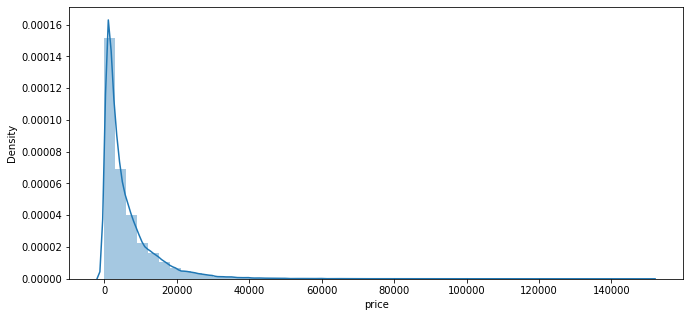

In [26]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(new_df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'kilometer Distribution Plot')

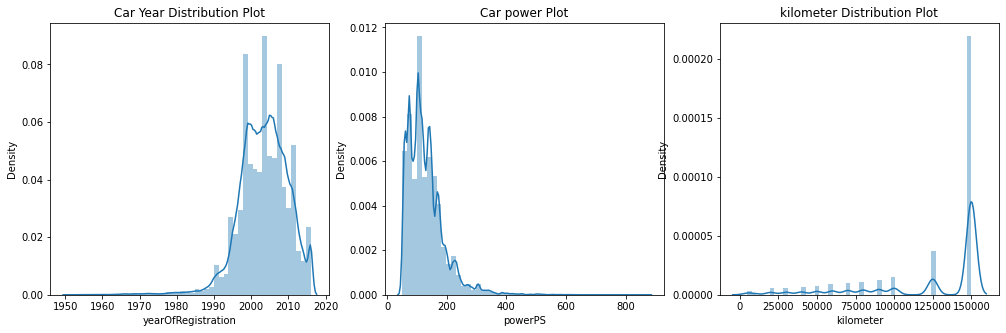

In [27]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(new_df['yearOfRegistration'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(new_df['powerPS'])
plt.title('Car power Plot')

plt.subplot(1,3,3)
sns.distplot(new_df['kilometer'])
plt.title('kilometer Distribution Plot')

In [28]:
new_df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,278363.000000,278363.000000,278363.000000,278363.000000
mean,6420.871750,2003.368558,129.252530,125331.240143
std,8352.494807,6.604359,61.748818,39353.170036
min,100.000000,1951.000000,51.000000,5000.000000
25%,1500.000000,1999.000000,86.000000,100000.000000
50%,3600.000000,2004.000000,116.000000,150000.000000
75%,8200.000000,2008.000000,150.000000,150000.000000
max,150000.000000,2016.000000,871.000000,150000.000000


Text(0.5, 1.0, 'Price and powerPS')

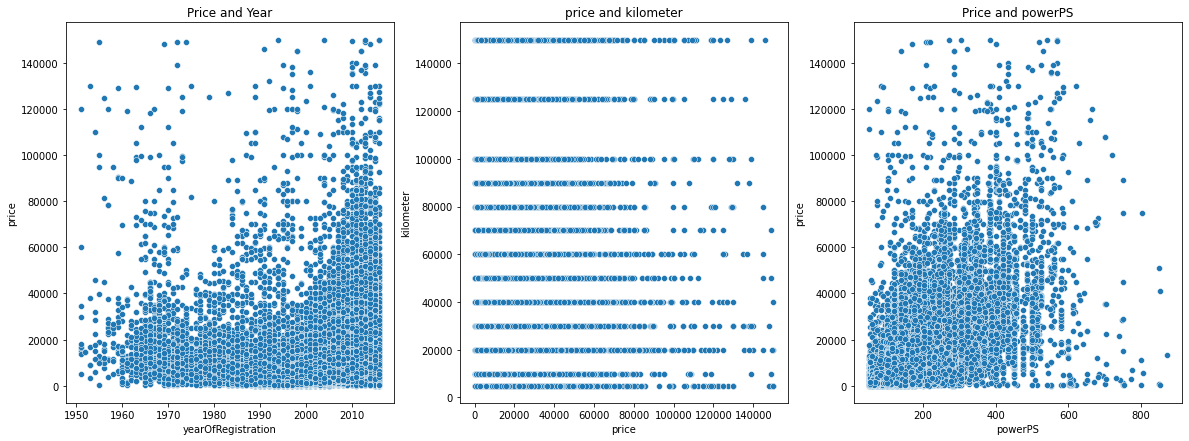

In [29]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='yearOfRegistration',y='price',data=new_df)

plt.subplot(1,3,2)
plt.title("price and kilometer")
sns.scatterplot(x='price',y='kilometer',data=new_df)

plt.subplot(1,3,3)
sns.scatterplot(y='price',x='powerPS',data=new_df)
plt.title("Price and powerPS")

In [30]:
# Let's transform 'Price' with a log transformation
log_price = np.log(new_df['price'])

# Then we add it to our data frame
new_df['log_price'] = log_price
new_df.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,log_price
1,privat,Angebot,18300,coupe,2011,manual,190,not-declared,125000,5,diesel,audi,Yes,9.814656
2,privat,Angebot,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,not-declared,9.190138
3,privat,Angebot,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No,7.313220
4,privat,Angebot,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No,8.188689
5,privat,Angebot,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,Yes,6.476972


Text(0.5, 1.0, 'Price and powerPS')

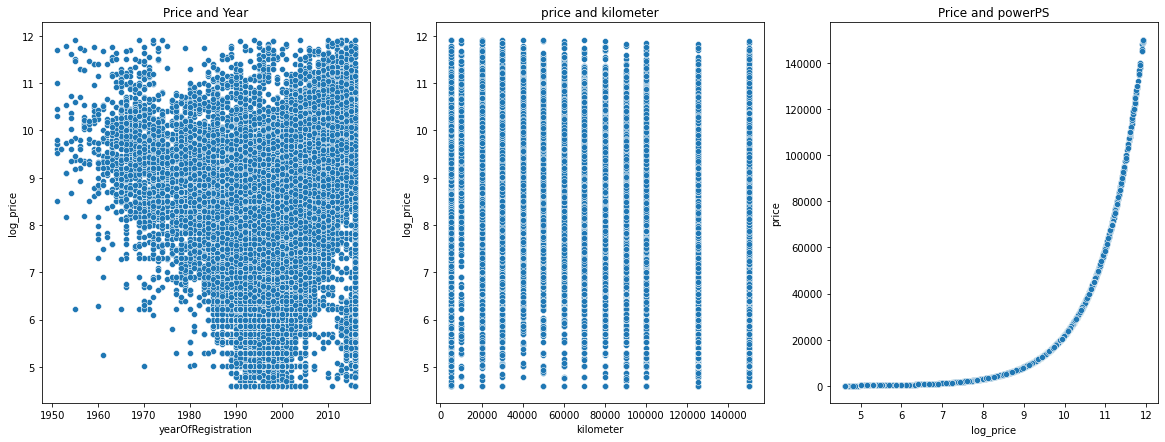

In [31]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='yearOfRegistration',y='log_price',data=new_df)

plt.subplot(1,3,2)
plt.title("price and kilometer")
sns.scatterplot(x='kilometer',y='log_price',data=new_df)

plt.subplot(1,3,3)
sns.scatterplot(y='price',x='log_price',data=new_df)
plt.title("Price and powerPS")

In [32]:
new_df= new_df.drop(['price'],axis=1)

In [33]:
new_df['monthOfRegistration']=new_df['monthOfRegistration'].astype(int)

In [34]:
labels= ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
mapper={}
for i in labels:
  mapper[i] =LabelEncoder() 
  mapper[i].fit(new_df[i]) 
  tr=mapper[i].transform(new_df[i]) 
  np.save(str('classes'+i+'.npy'), mapper[i].classes_) 
  print(i, ":",mapper[i]) 
  new_df.loc[:, i+'_labels'] = pd.Series (tr, index=new_df.index)
#Final data to be put in a new dataframe called "LABELED", 
labeled =new_df[ ['log_price','yearOfRegistration','powerPS','kilometer','monthOfRegistration']
+ [x+"_labels" for x in labels]]
print(labeled.values)


gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()
[[9.81465634e+00 2.01100000e+03 1.90000000e+02 ... 1.00000000e+00
  1.00000000e+00 3.00000000e+00]
 [9.19013766e+00 2.00400000e+03 1.63000000e+02 ... 1.40000000e+01
  1.00000000e+00 8.00000000e+00]
 [7.31322039e+00 2.00100000e+03 7.50000000e+01 ... 3.80000000e+01
  7.00000000e+00 7.00000000e+00]
 ...
 [9.12695876e+00 1.99600000e+03 1.02000000e+02 ... 3.80000000e+01
  1.00000000e+00 0.00000000e+00]
 [8.13153071e+00 2.00200000e+03 1.00000000e+02 ... 3.80000000e+01
  1.00000000e+00 1.00000000e+00]
 [1.02747062e+01 2.01300000e+03 3.20000000e+02 ... 2.00000000e+00
  7.00000000e+00 4.00000000e+00]]


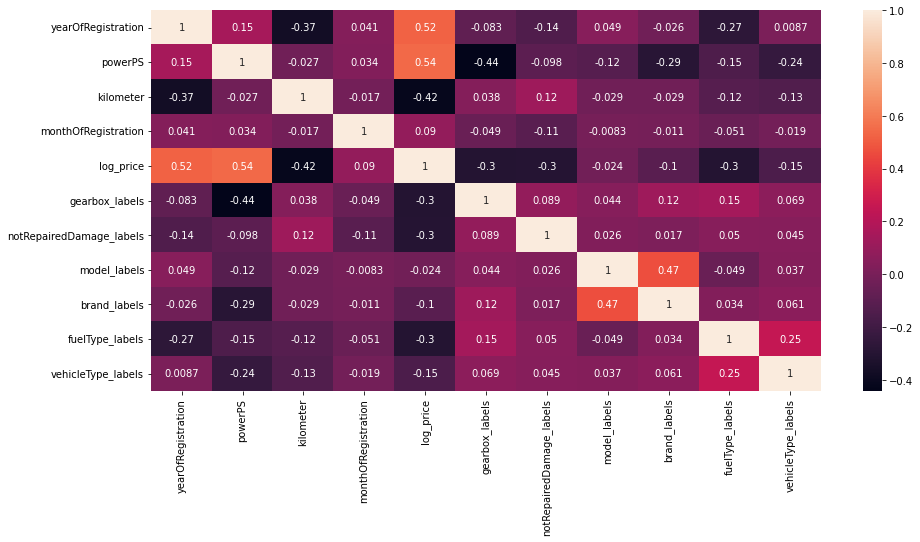

In [35]:
plt.figure(figsize=[15,7])
sns.heatmap(new_df.corr(), annot=True)

In [36]:
Y =labeled.iloc[:,0].values 

X = labeled.iloc[:,1:].values

#need to reshape the Y values

Y = Y.reshape(-1,1)

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=3)


In [38]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score 
regressor= RandomForestRegressor (n_estimators=1000, max_depth=10, random_state=34)

regressor.fit(X_train, np.ravel (Y_train, order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

In [39]:
y_pred=regressor.predict(X_test) 
print(r2_score (Y_test,y_pred))

0.8225564726727487


In [40]:
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
#Y_test=Y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(Y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
83504,4946.32,5790.00,843.68,14.57
83505,4177.92,5200.00,1022.08,19.66
83506,11025.04,12499.00,1473.96,11.79
83507,7967.92,9800.00,1832.08,18.69
83508,564.48,400.00,-164.48,41.12


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train,Y_train)

# Model Summary
y_pred_lr = lr.predict(X_test)

r_squared = r2_score(Y_test,y_pred_lr)

print("R_squared :",r_squared)


R_squared : 0.6360187526966443


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,Y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(Y_test,y_pred_gbt)

print("R_squared :",r_squared)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R_squared : 0.8320277052130418


In [43]:
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
#Y_test=Y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(Y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
83504,5554.97,5790.00,235.03,4.06
83505,3859.59,5200.00,1340.41,25.78
83506,9829.38,12499.00,2669.62,21.36
83507,8553.73,9800.00,1246.27,12.72
83508,640.32,400.00,-240.32,60.08


In [ ]:
filename = 'resale_model.sav'
pickle.dump(gbt, open(filename, 'wb'))

# New section